# Datenanalyse für Maschinelles Lernen
Die Ausgangsdaten beim maschinellen Lernen sind üblicherweise nicht speziell für das Ziel, welches mit dem dem maschinellen Lernen verfolgt wird, erfasst worden. Daher sind die folgenden Schritte vor dem Einsatz von maschinellen Lernverfahren notwendig (vgl. Frochte 2019, S. 16):
1. Verstehen der Anwendungsdomäne
2. Analyse der verfügbaren Daten
3. Auswahl geeigneter Daten
4. Bereinigung der Daten
5. Transformation der Daten
6. evtl. Reduktion der Daten

In dieser Veranstaltung wird detailliert auf Schritt 2 eingegangen und durch Beispiele illustriert. Falls Interesse an den anderen Schritten besteht, können diese gerne in (indivudellen) Veranstaltungen vorgestellt werden.

## Datenanalyse
Für die Datenanalyse liegt uns ein Datensatz der Webseite Kaggle.com als CSV-Datei vor. Bei CSV-Dateien muss man vorsichtig sein, da aus Excel generierte CSV-Dateien in Deutschland andere Trennzeichen verwendet als in anderen Ländern (Trennung zwischen Spalten mit Semikolon und als Dezimaltrennung das Komma). Der Datensatz hier verwendet zur  Trennung aber das Komma und den Punkt.
Der Beispieldatensatz stammt aus einem kontinuierlichen Prozess. Dieser besteht aus 3 parallel arbeitende Maschinen in der ersten Stufe. Der Output der einzelnen Maschinen wird durch eine weitere Maschine zusammengefügt. In der zweiten Prozessstufe gibt es nun zwei weitere Maschinen, die parallel den Output der ersten Stufe verarbeiten. 
Nachfolgend wird der Code zum Laden dieses Datensatzes für die Datenanalyse vorgestellt.

---
**Importierte Bibliotheken**

In [6]:
import pandas as pd
!git clone https://github.com/Hahn-Schickard/KI-Trainer
!echo $CWD
!cp -rf /content/KI-Trainer/* /content/

fatal: destination path 'KI-Trainer' already exists and is not an empty directory.



**Parameter**

In [2]:
pd.set_option('display.max_rows', None) # Anzahl der Zeilen wird bei der Ausgabe nicht begrenzt
pd.set_option('display.max_columns', None) # Anzahl der Spalten wird bei der Ausgabe nicht begrenzt
filepath='KI-Workshop_Daten.csv' # Pfad in der die Daten zu finden sind
separator=',' # Trennungszeichen zwischen Elementen
decimalseparator='.' # Dezimaltrennzeichen

**Code**

In [7]:
rawData = pd.read_csv(filepath, sep=separator, encoding='latin1', decimal=decimalseparator)

---
Jetzt stehen die Daten zur Analyse zur Verfügung.

### Struktur Tabelle
Zuerst werden die grundlegenden Strukturen der Daten ermittelt. Dazu wird sich die geladene Tabelle mit Hilfe des Befehls display() angeschaut um die verfügbaren Parameter und ihren Datentyp zu identifizieren.

---
**Code**

In [8]:
display(rawData.columns.values.tolist()) # Zeigt alle verfügbaren Parameter an

['time_stamp',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.RawMaterial.Property1',
 'Machine1.RawMaterial.Property2',
 'Machine1.RawMaterial.Property3',
 'Machine1.RawMaterial.Property4',
 'Machine1.RawMaterialFeederParameter.U.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine1.MotorAmperage.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine1.ExitZoneTemperature.C.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property2',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine2.Zone1Temperature.C.Actual',
 'Machine2.Zone2Temperature.C.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine2.MotorRPM.C.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine2.ExitZ

In [ ]:
display(rawData.dtypes) # Zeigt den Datentyp der Parameter an

time_stamp                                             object
AmbientConditions.AmbientHumidity.U.Actual            float64
AmbientConditions.AmbientTemperature.U.Actual         float64
Machine1.RawMaterial.Property1                        float64
Machine1.RawMaterial.Property2                          int64
Machine1.RawMaterial.Property3                        float64
Machine1.RawMaterial.Property4                          int64
Machine1.RawMaterialFeederParameter.U.Actual          float64
Machine1.Zone1Temperature.C.Actual                    float64
Machine1.Zone2Temperature.C.Actual                    float64
Machine1.MotorAmperage.U.Actual                       float64
Machine1.MotorRPM.C.Actual                            float64
Machine1.MaterialPressure.U.Actual                    float64
Machine1.MaterialTemperature.U.Actual                 float64
Machine1.ExitZoneTemperature.C.Actual                 float64
Machine2.RawMaterial.Property1                        float64
Machine2

In [ ]:
display(rawData.isnull().sum()) # Zeigt die Anzahl ungültiger Datensätze für einzelne Parameter an

time_stamp                                            0
AmbientConditions.AmbientHumidity.U.Actual            3
AmbientConditions.AmbientTemperature.U.Actual         1
Machine1.RawMaterial.Property1                        1
Machine1.RawMaterial.Property2                        0
Machine1.RawMaterial.Property3                        0
Machine1.RawMaterial.Property4                        0
Machine1.RawMaterialFeederParameter.U.Actual          0
Machine1.Zone1Temperature.C.Actual                    0
Machine1.Zone2Temperature.C.Actual                    1
Machine1.MotorAmperage.U.Actual                       0
Machine1.MotorRPM.C.Actual                            0
Machine1.MaterialPressure.U.Actual                    0
Machine1.MaterialTemperature.U.Actual                 0
Machine1.ExitZoneTemperature.C.Actual                 0
Machine2.RawMaterial.Property1                        0
Machine2.RawMaterial.Property2                        0
Machine2.RawMaterial.Property3                  

In [ ]:
pd.set_option('display.max_rows', 11) # Anzahl der Zeilen wird bei der Ausgabe auf 11 begrenzt
pd.set_option('display.max_columns', 11) # Anzahl der Spalten wird bei der Ausgabe auf 11 begrenzt
display(rawData) # Darstellung einer verkürzten Tabelle 

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,...,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,NaN,23.53,NaN,200,...,1.85,0.00,2.89,0.00,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,...,1.85,0.00,2.89,0.00,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,...,1.85,0.00,2.89,0.00,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,...,1.85,0.00,2.89,0.00,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,...,1.85,0.00,2.89,0.00,11.71
...,...,...,...,...,...,...,...,...,...,...,...
14083,2019-03-06 14:47:16,13.84,24.43,12.22,201,...,1.85,3.80,2.89,7.56,11.71
14084,2019-03-06 14:47:17,13.84,24.43,12.22,201,...,1.85,3.79,2.89,7.76,11.71
14085,2019-03-06 14:47:18,13.84,24.43,12.22,201,...,1.85,3.83,2.89,7.66,11.71
14086,2019-03-06 14:47:19,13.84,24.43,12.22,201,...,1.85,3.83,2.89,7.87,11.71


Diese vier Befehle geben einem einen ersten Überblick über die Daten:  
1. Der Befehl display(rawData.columns.values.tolist()) listet die Namen aller Spalten auf. Hilfreich ist es für die Datenanalyse kryptische Spaltenbezeichnungen umzubenennen (z.B. 'data21' in 'Umdrehungsgeschwindigkeit'), wobei dies entsprechend dokumentiert werden sollte.
2. Der Befehl display(rawData.dtypes) gibt die Datentypen für alle Spalten an. Damit kann man schnell feststellen, ob man Datentypen umcodieren muss (z.B. String in Int).
3. Der Befehl display(rawData.isnull().sum()) summiert für jede Spalte leere Einträge auf. Falsche Einträge können so zwar nicht erkannt werden. Die Auflistung unvollständiger Datensätze hilft jedoch bei der späteren Datenaufbereitung. Bei vielen fehlerhaften Datensätze hat man die Wahl entsprechende Spalten mit vielen fehlenden Datensätzen nicht zu berücksichtigen (Schritt 3 Auswahl geeigneter Daten) oder mehr Aufwand in Schritt 4 Bereinigung der Daten in Kauf nehmen. 
4. Der Befehl display(rawData) zeigt die kompletten Daten an. Man sollte die Anzahl der angezeigten Spalten und Zeilen aber begrenzen.

---

### Struktur Daten
Nachdem wir die Struktur der Tabelle verstanden haben, müssen wir die Struktur der Parameter identifizieren. Was dabei wichtig ist, sind das Wissen über die Verteilung der Daten, Ausreißer, Median, Mittelwert, Quantilen sowie Minimal- und Maximalwert. Neben der Produktionstabelle wird ein weiteres Beispiel mit bekannten Beziehungen präsentiert. Bei der Reihenmessung SizeGermany (Frauen) wurden unter anderem das Gewicht und die Körpergröße erfasst und daraus der BMI berechnet (BMI = KH/(Gewicht)^2). 

---
**Importierte Bibliotheken**

In [ ]:
import matplotlib.pyplot as plt

**Parameter**

In [ ]:
columns=['Machine4.Pressure.C.Actual', 
         'AmbientConditions.AmbientTemperature.U.Actual', 
         'FirstStage.CombinerOperation.Temperature1.U.Actual']

**Code**

In [ ]:
print('Median')
display(rawData[columns].median()) # Median berechnen
print('')

print('Mittelwert')
display(rawData[columns].mean()) # Mittelwert berechnen

Median


Machine4.Pressure.C.Actual                             17.00
AmbientConditions.AmbientTemperature.U.Actual          23.93
FirstStage.CombinerOperation.Temperature1.U.Actual    105.50
dtype: float64


Mittelwert


Machine4.Pressure.C.Actual                             17.226269
AmbientConditions.AmbientTemperature.U.Actual          23.843629
FirstStage.CombinerOperation.Temperature1.U.Actual    108.917970
dtype: float64

Hier das Beispiel für den BMI

**Parameter**

In [ ]:
filepath2='KI-Workshop_Daten2.csv' # Pfad in der die Daten zu finden sind
separator=';' # Trennungszeichen zwischen Elementen
decimalseparator=',' # Dezimaltrennzeichen

columns2=['BMI',
         'Gewicht',
         'KH']

**Code**

In [ ]:
rawData2 = pd.read_csv(filepath2, sep=separator, encoding='latin1', decimal=decimalseparator)
print('Median')
display(rawData2[columns2].median()) # Median berechnen
print('')

print('Mittelwert')
display(rawData2[columns2].mean()) # Mittelwert berechnen

Median


BMI         26.3205
Gewicht     68.9000
KH         161.4000
dtype: float64


Mittelwert


BMI         27.819662
Gewicht     72.066716
KH         159.678063
dtype: float64

Interessant ist auch die Verteilung für die einzelnen Werte. Dabei hilft der Boxplot, in dem er visuell hilft Ausreißer zu entdecken.

**Code**

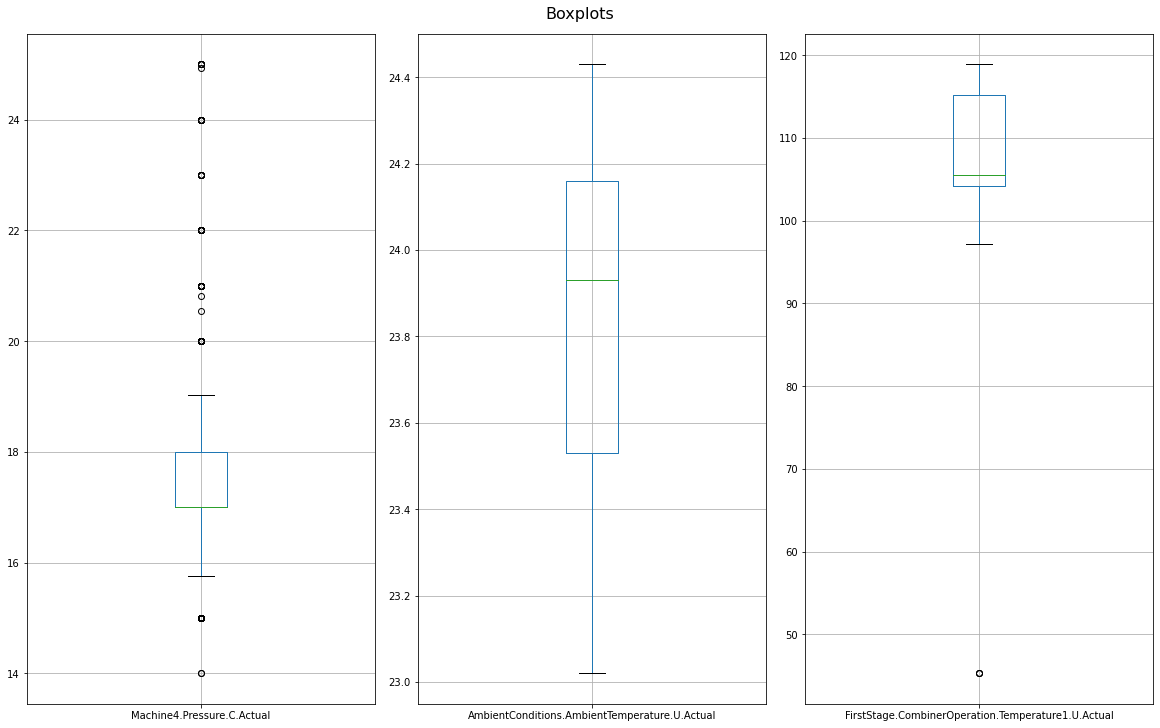

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,10), constrained_layout=True) # Grafik bestehend aus 3 Teilgrafiken in 3 Spalten und einer Zeile erstellen
fig.suptitle('Boxplots', fontsize=16) # Titel für die Grafiken festlegen
for i, ax in enumerate(axs.flat): # Iterieren über die 3 Teilgrafiken 
    rawData.boxplot(column=columns[i], vert=True, ax=ax) # Erstellung eines Boxplots für die 3 Tabellenspalten

Hier die Darstellung für die Parameter des BMI-Beispiels.

**Code**

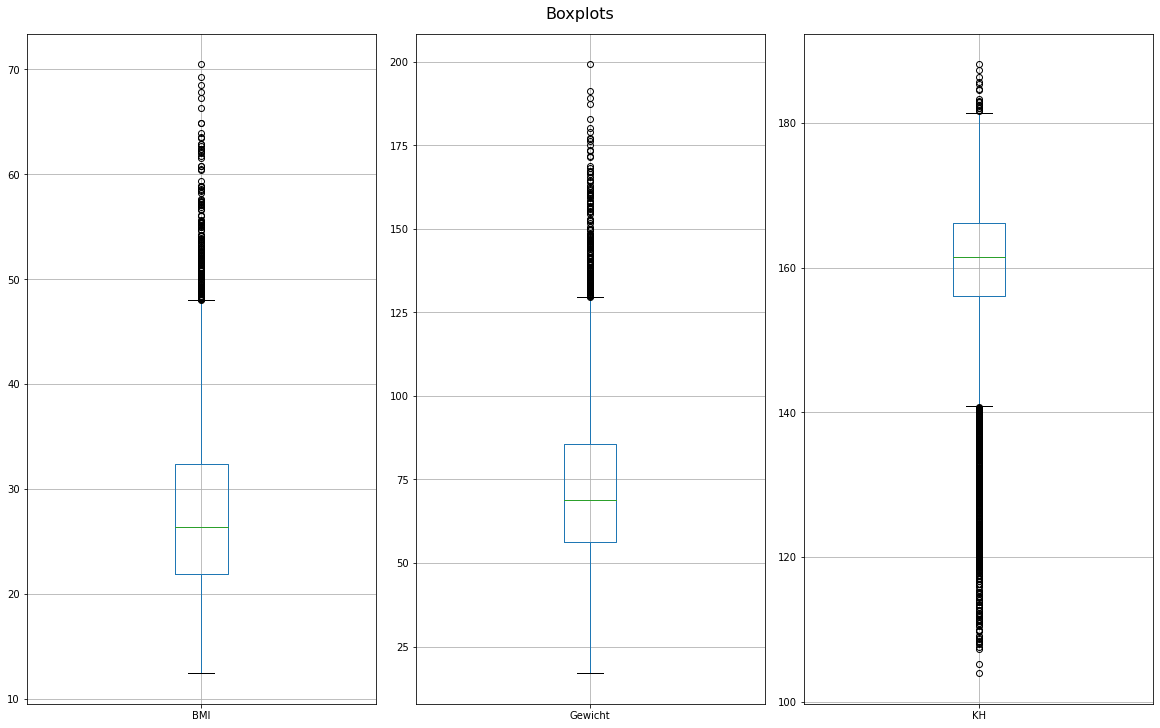

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,10), constrained_layout=True) # Grafik bestehend aus 3 Teilgrafiken in 3 Spalten und einer Zeile erstellen
fig.suptitle('Boxplots', fontsize=16) # Titel für die Grafiken festlegen
for i, ax in enumerate(axs.flat): # Iterieren über die 3 Teilgrafiken 
    rawData2.boxplot(column=columns2[i], vert=True, ax=ax) # Erstellung eines Boxplots für die 3 Tabellenspalten

Ein weitere Darstellungsvariante ist die Kerndichteschätzung. Damit kann man beispielsweise ermitteln, ob die Daten einer Normalverteilung folgen oder nicht. Dies ist für einige KI-Ansätze wichtig zu wissen, da im Bedarfsfall die Daten transformiert werden müssen.

**Code**

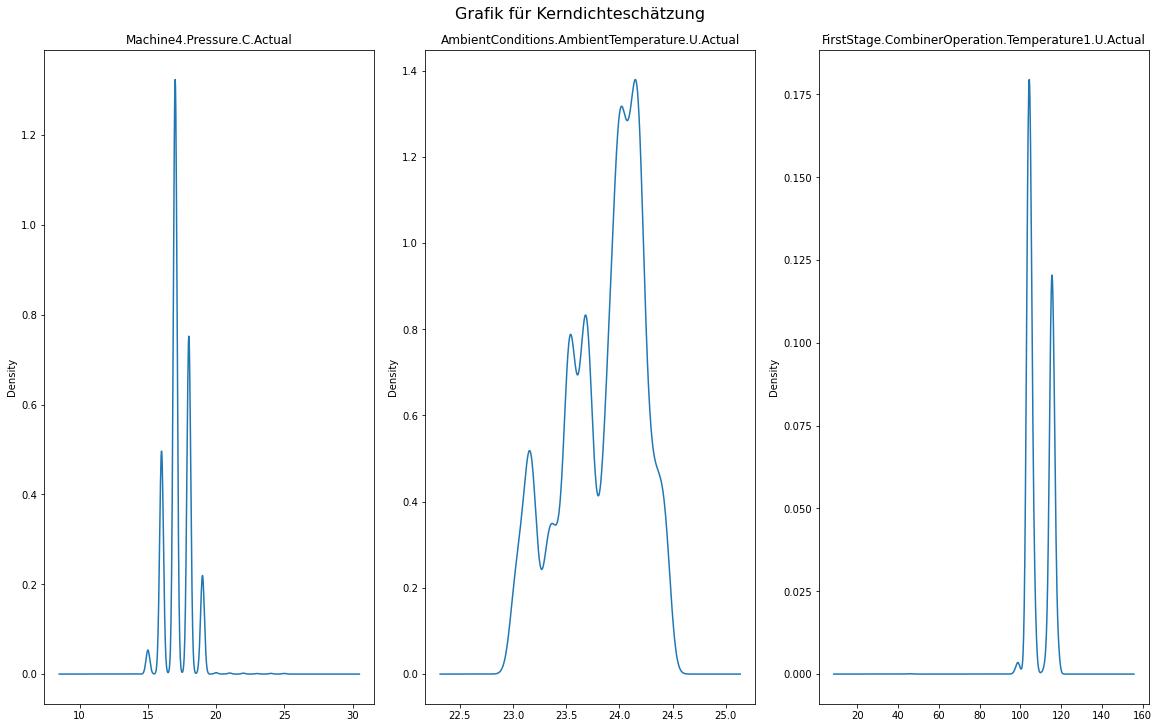

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,10), constrained_layout=True) # Grafik bestehend aus 3 Teilgrafiken in 3 Spalten und einer Zeile erstellen
fig.suptitle('Grafik für Kerndichteschätzung', fontsize=16) # Titel für die Grafiken festlegen
for i, ax in enumerate(axs.flat): # Iterieren über die 3 Teilgrafiken
    ax.title.set_text(columns[i]) # Titel für die Teilgrafiken festlegen
    rawData[columns[i]].plot.kde(ax=ax) # Grafik für Kerndichteschätzung erstellen

Hier die Darstellung für die Parameter des BMI-Beispiels.

**Code**

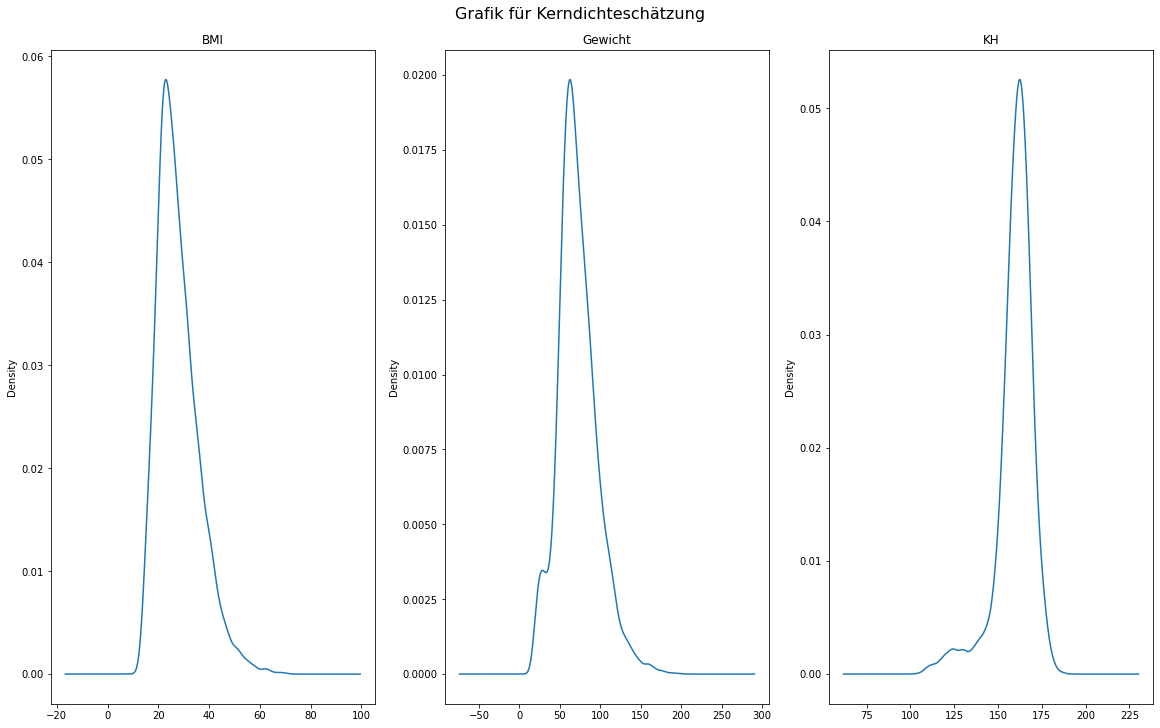

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,10), constrained_layout=True) # Grafik bestehend aus 3 Teilgrafiken in 3 Spalten und einer Zeile erstellen
fig.suptitle('Grafik für Kerndichteschätzung', fontsize=16) # Titel für die Grafiken festlegen
for i, ax in enumerate(axs.flat): # Iterieren über die 3 Teilgrafiken
    ax.title.set_text(columns2[i]) # Titel für die Teilgrafiken festlegen
    rawData2[columns2[i]].plot.kde(ax=ax) # Grafik für Kerndichteschätzung erstellen

---

### Struktur zwischen Daten
Nachdem wir jetzt die Struktur der einzelnen Parameter kennen, geht es jetzt um die Beziehungen zwischen den einzelnen Parametern. Die Korrelationsmatrix bietet eine einfache Möglichkeit um lineare Zusammenhänge zwischen Parametern zu identifizieren.

---
**Importierte Bibliotheken**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Parameter**

In [ ]:
columns=['Machine1.RawMaterial.Property1',
         'Machine1.RawMaterial.Property2',
         'Machine1.RawMaterial.Property3',
         'Machine1.RawMaterial.Property4',
         'Stage2.Output.Measurement0.U.Actual']

**Code**

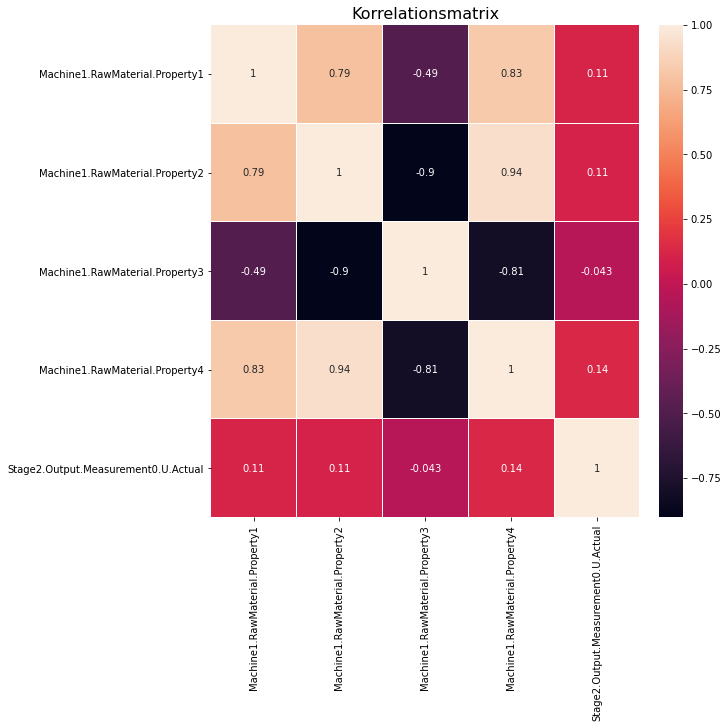

In [ ]:
plt.figure(figsize=(10, 10), constrained_layout=True)
corrSet = pd.DataFrame(rawData[columns])
heatmap = sns.heatmap(corrSet.corr(),
    annot=True, linewidth=0.2)
plt.title('Korrelationsmatrix', fontsize=16); # Titel für die Grafiken festlegen, Strichpunkt unterdrückt Textausgabe von letztem Kommando

**Parameter**

In [ ]:
columns2=['BMI',
         'Gewicht',
         'KH']

**Code**

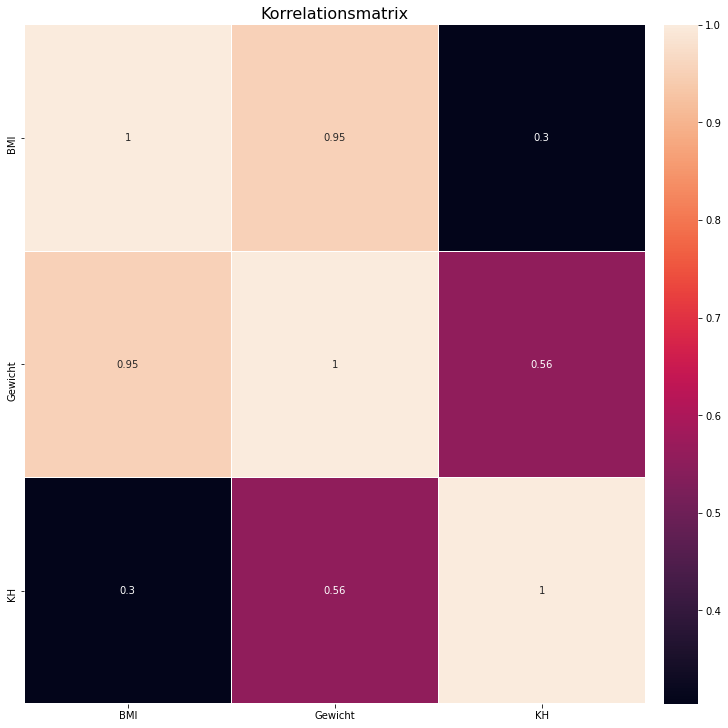

In [ ]:
plt.figure(figsize=(10, 10), constrained_layout=True)
corrSet = pd.DataFrame(rawData2[columns2])
heatmap = sns.heatmap(corrSet.corr(),
    annot=True, linewidth=0.2)
plt.title('Korrelationsmatrix', fontsize=16); # Titel für die Grafiken festlegen, Strichpunkt unterdrückt Textausgabe von letztem Kommando

Wie man sieht, gibt es eine sehr starke Korrelation zwischen Gewicht und BMI. Die Korrelation zwischen Körpergröße und BMI ist dagegen sehr gering.

---
Eine weitere Variante sind die Streudiagramme für alle Parameterkombinationen. Nachfolgender Code kombiniert die Streudiagramme mit der Kerndichteschätzung (Diagonale).

---
**Importierte Bibliotheken**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Parameter**

In [ ]:
columns=['Machine1.RawMaterial.Property1',
         'Machine1.RawMaterial.Property2',
         'Machine1.RawMaterial.Property3',
         'Machine1.RawMaterial.Property4',
         'Stage2.Output.Measurement0.U.Actual']

**Code**

<Figure size 720x720 with 0 Axes>

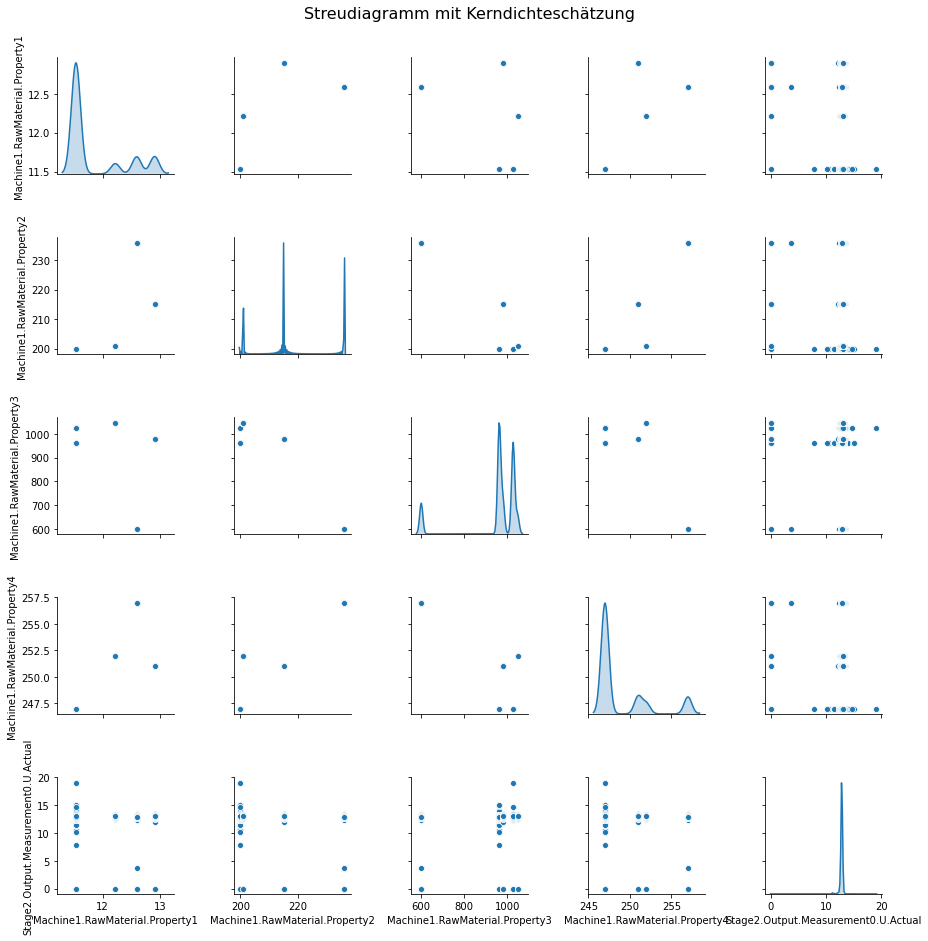

In [ ]:
plt.figure(figsize=(10, 10), constrained_layout=True)
corrSet = pd.DataFrame(rawData[columns])
pairplot = sns.pairplot(corrSet, diag_kind='kde')
pairplot.fig.suptitle('Streudiagramm mit Kerndichteschätzung', fontsize=16, y=1.03); # Titel für die Grafiken festlegen, Strichpunkt unterdrückt Textausgabe von letztem Kommando

Hier zum Vergleich nochmal das Streudiagramm für den BMI.

**Parameter**

In [ ]:
columns=['BMI',
         'Gewicht',
         'KH']

**Code**

<Figure size 720x720 with 0 Axes>

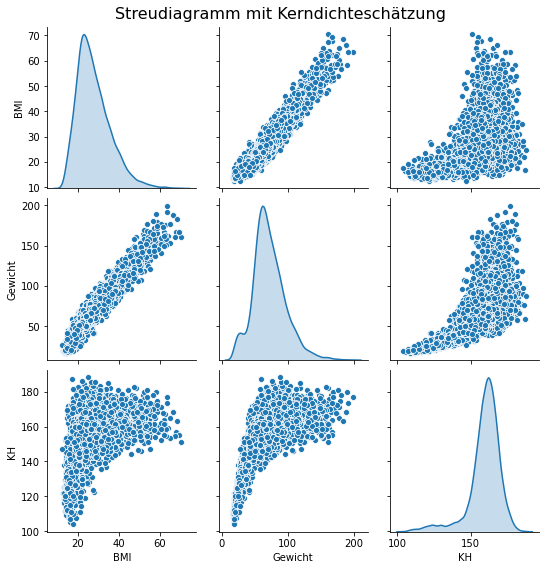

In [ ]:
plt.figure(figsize=(10, 10), constrained_layout=True)
corrSet = pd.DataFrame(rawData2[columns2])
pairplot = sns.pairplot(corrSet, diag_kind='kde')
pairplot.fig.suptitle('Streudiagramm mit Kerndichteschätzung', fontsize=16, y=1.03); # Titel für die Grafiken festlegen, Strichpunkt unterdrückt Textausgabe von letztem Kommando

Hier sieht man sehr deutlich die Korrelation zwischen Gewicht und BMI. Aber auch die Beziehung zwischen BMI und Körpergröße ist interessant. Man sieht das Kinder mit dabei waren und das eine Art Maximalwert für den BMI für die Körpergröße existiert.

---
Dies sind nur einige Möglichkeiten der Datenanalyse. 

## Literatur
[1] Frochte, Jörg (2019), Maschinelles Lernen - Grundlagen und Algorithmen in Python, 2., aktualisierte Auflage, München